### Regularization

Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting.

The commonly used regularization techniques are : 
 

L1 regularization
L2 regularization
Dropout regularization

This article focus on L1 and L2 regularization. 

A regression model which uses L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression. 

A regression model that uses L2 regularization technique is called Ridge regression. 

Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function(L). 

### NOTE:

#In lasso regression the variable can be completely omited which in underfit and overfit

#In ridge regresssion the variable will reduce the difference between very high and very low to a normal extent 

in both lasso,ridge Alpha is the parameter is used to control the value....

### Elastic net linear regression

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

# Regularization in Machine Learning

While training a machine learning model, the model can easily be over-fitted or under-fitted. To this, we use regularization in machine learning to properly fit a model onto our test set. regularization techniques help reduce the chance of overfitting an underfitting and helps us get an optimal model. 

### What are Overfitting and underfitting?

Overfitting- is when it understand all it points and give and cant predict any new data points.

Underfitting- is when it doesn't understand the data and draws a best fit lines away from learning points.

To train the machine learning model, we give it data to learn from. The process of plotting a series of data points and drawing the best fit line to understand the relationship of variables is called Data Fitting. Our model is the best fit when it can find all necessary patterns in our data and avoid the random data points and un-necessary patterns called as Noise.

## BIAS and VARIANCE

A Bias occurs when an algorithm has limited flixible to learn from data, Such models pay very little attention to the training data and oversimplify the model therefore the validation error, prediction error and training error follow similar trends.

Such models always lead to a high error on training and test data.High Bias causes underfitting in our model


Variance defines the algorithm's sensitivity to specific sets of data. A model with a high variance pays a lot of attention to training data and doesn't generalize therefore the validation error or prediction error are far apart from each other. Such models usually perform very well on training data but have high error rates on the test data.

High Variance cause overfitting in our model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=load_boston()

In [3]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
ds=pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
ds['target']=pd.DataFrame(data=data.target)

In [8]:
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
ds.shape

(506, 14)

In [11]:
ds.size

7084

In [12]:
ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [13]:
x=ds.iloc[:,0:13]

In [14]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
y=data.target

In [16]:
y.shape

(506,)

In [17]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.32,random_state=47)

In [18]:
train_x.shape

(344, 13)

In [19]:
train_y.shape

(344,)

In [20]:
test_x.shape

(162, 13)

In [21]:
test_y.shape

(162,)

In [22]:
lm=LinearRegression()

In [23]:
lm.fit(train_x,train_y)

LinearRegression()

In [24]:
lm.score(train_x,train_y)

0.7665377487934006

In [25]:
lm.coef_

array([-1.10477962e-01,  3.78295361e-02,  9.08933058e-03,  3.12782839e+00,
       -1.61112914e+01,  4.83746926e+00, -1.48440766e-02, -1.41142212e+00,
        2.59718929e-01, -1.21424852e-02, -9.36906645e-01,  9.14706110e-03,
       -3.99081206e-01])

In [26]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

<BarContainer object of 13 artists>

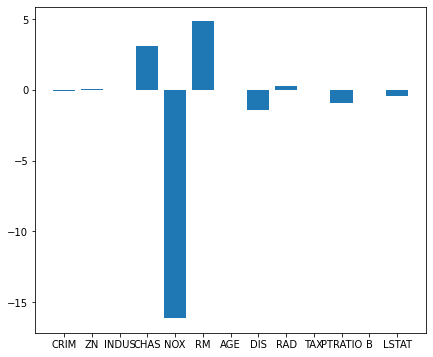

In [27]:
plt.figure(figsize=(7,6))

plt.bar(data.feature_names,lm.coef_)

In [28]:
ds.shape

(506, 14)

In [29]:
ds['B']

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

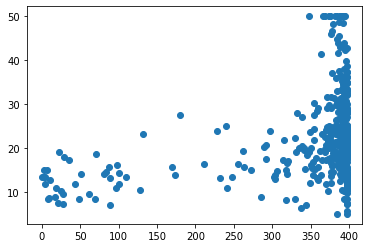

In [30]:
plt.scatter(ds['B'],y)

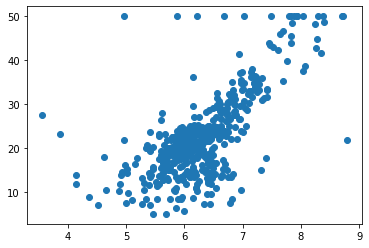

In [31]:
plt.scatter(ds['RM'],y)

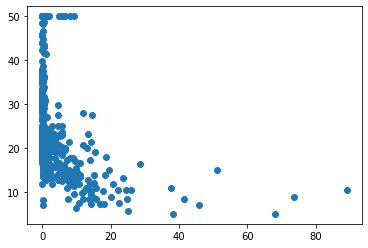

In [32]:
plt.scatter(ds['CRIM'],y)

In [33]:
lm.coef_

array([-1.10477962e-01,  3.78295361e-02,  9.08933058e-03,  3.12782839e+00,
       -1.61112914e+01,  4.83746926e+00, -1.48440766e-02, -1.41142212e+00,
        2.59718929e-01, -1.21424852e-02, -9.36906645e-01,  9.14706110e-03,
       -3.99081206e-01])

In [34]:
pred=lm.predict(test_x)
print("Result predict",pred)
print("Actual result ",test_y)

Result predict [15.93891888 32.34111451 24.42002642 30.87824992 27.35719811 19.615433
 23.05981337 31.95748808 32.39966118 22.40509582 24.89194947 27.29836789
 20.13913926 27.68760888 31.76486714 10.38003267 36.16486026 15.01423769
 11.78163591 15.59985251 35.21375069 22.18885023 38.72867424 20.33510893
 28.46218143 18.94597577 24.09675641 20.8218838  19.62007378 26.46551886
 14.18435365 25.9096614  17.63365209  8.13114295 32.59594712 19.01110948
 12.34109137 27.15235686 22.7656168  18.73306674 23.66607687 25.18441482
 37.27122544 21.29977287 32.21780907 19.97693546  7.16617762 28.09155156
 36.40831692 21.59231517 28.94516185 23.8392457   7.42651089 24.24734204
  6.22910824 21.87434925 18.37938856 13.17124682  6.08209187 30.08796618
 12.35217022 17.73999458 17.96258998 19.05582206 42.28920781 22.38939614
 20.48427266 23.82207535 25.57893453 27.45322871 29.57197027 19.50723883
 24.51250508 22.68855573 30.97551413 13.68664321 17.87535942 20.33133088
 16.65372831 16.95741704  2.51165959 3

In [35]:
print("Mean Squared Error \n",mean_squared_error(pred,test_y))

Mean Squared Error 
 27.833516998595737


In [36]:
# predict the house price of the following

t=np.array([0.00632,18.0,2.31,0.0,0.538,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,34])

In [37]:
t.shape

(13,)

In [38]:
t=t.reshape(1,-1)

In [39]:
t.shape

(1, 13)

In [40]:
lm.predict(t)

array([25.76173266])

# Regulaization::L1 AND L2 REGULARIZATION

In [41]:
from sklearn.linear_model import Lasso,Ridge

In [42]:
#will reduce the coefficient to zero(these features are not informative)

# alpha value(---->.0001, 0.001, 0.01, 0.1,1,10--->higher value will reduce coefficients towards 0 and impact output)
#Default value of alpha= 1.0
# alpha=0.1

ls=Lasso(alpha=0.0001)
#ls=lasso(alpha=1.0) #by default

ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.7665377066131066

In [43]:
ls.coef_

array([-1.10458660e-01,  3.78363623e-02,  8.93013693e-03,  3.12616280e+00,
       -1.60781664e+01,  4.83763415e+00, -1.48725710e-02, -1.41096290e+00,
        2.59629860e-01, -1.21452157e-02, -9.36465601e-01,  9.14911341e-03,
       -3.99108100e-01])

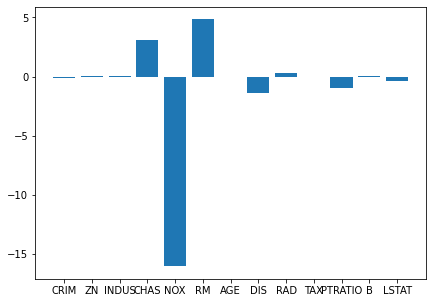

In [44]:
plt.figure(figsize=(7,5))
plt.bar(data.feature_names,ls.coef_)
plt.show()

In [45]:
rd=Ridge(alpha=0.001)
#rd=Ridge()
rd.fit(train_x,train_y)
rd.score(train_x,train_y)

0.7665377404511846

In [46]:
rd.coef_

array([-1.10469454e-01,  3.78325083e-02,  9.01694308e-03,  3.12757754e+00,
       -1.60962167e+01,  4.83763698e+00, -1.48589939e-02, -1.41122328e+00,
        2.59678001e-01, -1.21436369e-02, -9.36703361e-01,  9.14802813e-03,
       -3.99086085e-01])

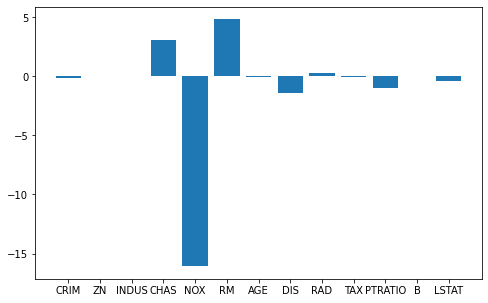

In [47]:
plt.figure(figsize=(8,5))
plt.bar(data.feature_names,rd.coef_)
plt.show()

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
enr=ElasticNet(alpha=.0001)

enr.fit(train_x,train_y)
enrpredict=enr.predict(train_x)

In [50]:
enr.score(train_x,train_y)

0.7665350353498002

In [51]:
enr.coef_

array([-1.10324402e-01,  3.78833591e-02,  7.78451711e-03,  3.12271676e+00,
       -1.58395847e+01,  4.84037502e+00, -1.51106613e-02, -1.40782817e+00,
        2.58982284e-01, -1.21633723e-02, -9.33246638e-01,  9.16444801e-03,
       -3.99178375e-01])

In [52]:
from sklearn.svm import SVR

In [54]:
# Using svm-->svr classifier 

kernallist=['linear','poly', 'rbf', 'sigmoid']

for i in kernallist:
    svr=SVR(kernel=i)
    svr.fit(train_x,train_y)
    print(svr.score(train_x,train_y))
    

0.7387466427426315
0.22465074374482608
0.23495154421727116
0.10781229392263536


In [57]:
svr=SVR(kernel='linear')
svr.fit(train_x,train_y)
print(svr.score(train_x,train_y))
pred_y=svr.predict(train_x)
print('predict \n',pred_y,"\n")


svr=SVR(kernel='poly')
svr.fit(train_x,train_y)
print(svr.score(train_x,train_y))
pred_y=svr.predict(train_x)
print('predict \n',pred_y,"\n")

svr=SVR(kernel='rbf')
svr.fit(train_x,train_y)
print(svr.score(train_x,train_y))
pred_y=svr.predict(train_x)
print("Prediction \n",pred_y,"\n")

0.7387466427426315
predict 
 [18.33629223 11.07737326 24.81185402 31.72673665 32.54549125 20.87561147
 26.71403013 14.49151106 31.59897035 20.62337315 16.08589623 20.79374971
 23.07684409 21.68668259 14.83704434 25.2287015  18.91207487 22.67076179
 22.11287836 34.09808376 23.96120092 21.19853555 21.8194755  32.60978138
 20.51683657 27.03345845 -6.66593328 21.49957862 14.62483144 23.48314135
 16.70204735 27.44527019 21.65204422 18.78233798 24.20094394 24.99411406
 15.14362815 24.83038133 41.81225646 33.51319757 22.85857714 16.87564881
 12.59786628  5.93464812 26.46079525 24.73621204 24.13129888 14.01551503
 25.09448589 14.10099148 32.95642496 16.7064389  17.39312153 17.29331439
 22.82424948 20.59423522 21.34226793 14.58837257 23.20549246 27.14172477
 36.2969362  17.8176151  16.55425216 12.1506228  13.09532352 19.1746415
 21.40112199 27.70771686 24.91279493 23.66189955 19.55885846  6.04863182
 30.85777447 25.32828599  8.61512759 25.37311401 18.82022449 20.71760714
 29.75327548  7.0640919

In [58]:
from sklearn.neighbors import KNeighborsClassifier # main lib
from sklearn.neighbors import KNeighborsRegressor # for regression 

In [59]:
from sklearn.neighbors import KNeighborsRegressor # for regression 

knr=KNeighborsRegressor() # making instance and calling.

knr.fit(train_x,train_y)
print(knr.score(train_x,train_y))
predict_knr=knr.predict(train_x)


0.6697242195016293


In [60]:
from sklearn.tree import DecisionTreeRegressor # calling lib

dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)
print(dtr.score(train_x,train_y))
predict_dtr=dtr.predict(train_x)
print(predict_dtr)

1.0
[13.8 14.6 24.7 35.4 32.4 20.3 24.4 13.3 31.5 22.  13.4 21.7 21.9 21.
 16.2 23.9 20.4 20.7 20.6 33.8 23.2 21.1 20.1 36.1 18.9 23.3  7.  18.9
 13.3 23.8 23.2 32.5 23.3 16.2 23.8 24.8 14.5 24.1 50.  33.2 22.2  7.2
 11.8 14.4 24.8 26.6 15.  14.3 22.3  7.5 37.3 14.9 19.1 17.5 22.2 19.3
 19.2 19.1 22.6 23.9 43.1 16.6 19.4 13.8 13.9 13.1 20.9 26.4 25.3 21.6
 27.1 16.3 32.7 33.  12.  23.1 18.9 23.1 27.9 15.  13.8 16.5 19.9 19.
 17.9 15.2 24.   8.3 19.9 21.2 14.9 12.6 33.4 21.9 22.9 29.4 16.8  5.6
 31.1 15.2 20.8 18.9 16.  11.9 20.3 16.6 11.7 20.5 14.  21.7  8.4 15.4
 21.  28.6 29.  24.8 21.7 20.5 34.9 22.9 20.1 17.6 29.8 12.3 20.8 19.4
 20.6 50.  24.3 22.7 10.2 29.1 20.  21.1 43.8 34.9 38.7 22.8 22.  31.5
 14.5 17.5 23.7 31.7 30.1 18.5 19.   8.4 24.7 20.4 13.4 25.  32.  24.6
 22.8 20.  19.8 45.4 20.2 21.5 21.  22.  18.3 33.1 24.1 21.7 33.2 19.5
 18.6 18.5 48.8 23.6 23.8 29.  44.8 23.9 13.3 23.2 22.  24.1 17.3 34.6
 10.5 21.2 15.3 21.2 21.6  5.  13.  16.1 21.2 50.  20.1 28.4 16.4  8.1
 13.